# GARCH Stock Forecasting

## Read Data

In [5]:
# import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

## DIS Volatility

In [6]:
df = yf.download('AAPL', start='2010-01-01', end='2023-10-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
returns = 100 * df.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

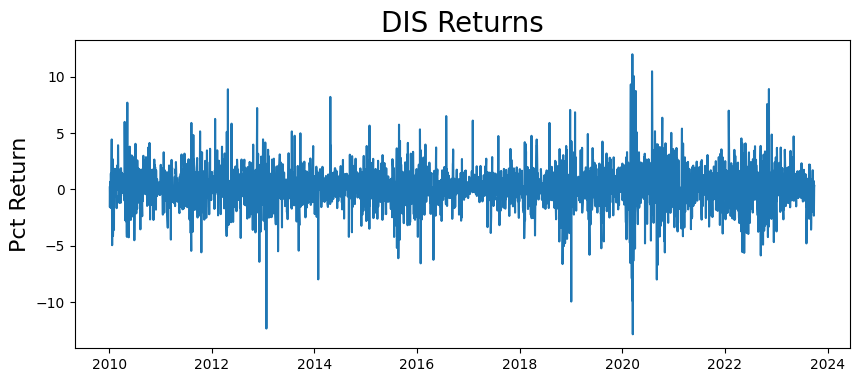

In [9]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

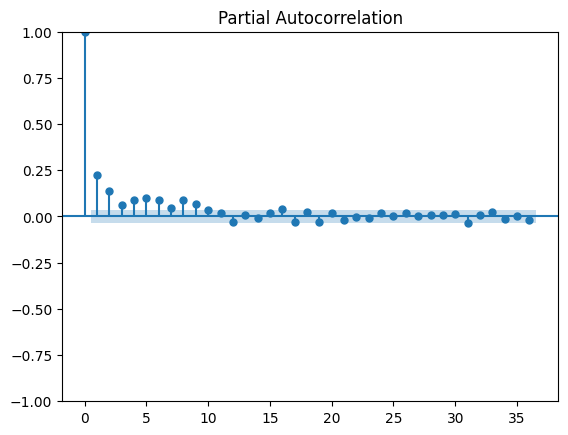

In [10]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [11]:
model = arch_model(returns, p=3, q=3)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 20981.050603433385
Iteration:      2,   Func. Count:     23,   Neg. LLF: 6160229.620129924
Iteration:      3,   Func. Count:     34,   Neg. LLF: 7094.865233813044
Iteration:      4,   Func. Count:     45,   Neg. LLF: 6881.02181307121
Iteration:      5,   Func. Count:     56,   Neg. LLF: 6971.820621898033
Iteration:      6,   Func. Count:     66,   Neg. LLF: 6729.132884972884
Iteration:      7,   Func. Count:     77,   Neg. LLF: 6675.347917528335
Iteration:      8,   Func. Count:     87,   Neg. LLF: 6653.283346168568
Iteration:      9,   Func. Count:     96,   Neg. LLF: 6657.138483487917
Iteration:     10,   Func. Count:    107,   Neg. LLF: 6663.214379212717
Iteration:     11,   Func. Count:    118,   Neg. LLF: 6652.906860647534
Iteration:     12,   Func. Count:    127,   Neg. LLF: 6652.893889200104
Iteration:     13,   Func. Count:    136,   Neg. LLF: 6652.879041481269
Iteration:     14,   Func. Count:    145,   Neg. LLF: 6653.31019

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6652.83
Distribution:                  Normal   AIC:                           13321.7
Method:            Maximum Likelihood   BIC:                           13370.8
                                        No. Observations:                 3458
Date:                Sun, Jun 22 2025   Df Residuals:                     3457
Time:                        08:19:02   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1831  2.934e-02      6.242  4.324e-10 [  0.126,  0.241]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2965      2.839      0.104      0.917    [ -5.268,  5.861]
alpha[1]       0.1305  7.406e-02      1.761  7.816e-02 [-1.470e-02,  0.276]
alpha[2]       0.0592      1.268  4.673e-02      0.963    [ -2.426,  2.544]
alpha[3]   8.7766e-19      0.602  1.459e-18      1.000    [ -1.179,  1.179]
beta[1]        0.1069      9.952  1.074e-02      0.991    [-19.400, 19.613]
beta[2]        0.5510      1.951      0.282      0.778    [ -3.273,  4.375]
beta[3]        0.0615      5.357  1.148e-02      0.991    [-10.438, 10.561]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [14]:
model = arch_model(returns, p=3, q=0)

In [15]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 19017.159997342875
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12007.643631055125
Iteration:      3,   Func. Count:     26,   Neg. LLF: 9705.069553428406
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1963361.5739653907
Iteration:      5,   Func. Count:     40,   Neg. LLF: 10611.415788713524
Iteration:      6,   Func. Count:     47,   Neg. LLF: 7490.814752797851
Iteration:      7,   Func. Count:     55,   Neg. LLF: 6926.902968069118
Iteration:      8,   Func. Count:     62,   Neg. LLF: 12574.139259977444
Iteration:      9,   Func. Count:     69,   Neg. LLF: 6738.484019892298
Iteration:     10,   Func. Count:     75,   Neg. LLF: 6738.473937459713
Iteration:     11,   Func. Count:     81,   Neg. LLF: 6738.473378373659
Iteration:     12,   Func. Count:     87,   Neg. LLF: 6738.47336757919
Iteration:     13,   Func. Count:     92,   Neg. LLF: 6738.473367578888
Optimization terminated successfully    (Exit mode 0)
      

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6738.47
Distribution:                  Normal   AIC:                           13486.9
Method:            Maximum Likelihood   BIC:                           13517.7
                                        No. Observations:                 3458
Date:                Sun, Jun 22 2025   Df Residuals:                     3457
Time:                        08:19:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1550  3.074e-02      5.042  4.597e-07 [9.477e-02,  0.215]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.8370      0.157     11.715  1.068e-31   [  1.530,  2.144]
alpha[1]       0.1923  4.346e-02      4.425  9.666e-06   [  0.107,  0.277]
alpha[2]       0.1152  3.156e-02      3.649  2.628e-04 [5.332e-02,  0.177]
alpha[3]       0.1410  3.759e-02      3.752  1.755e-04 [6.736e-02,  0.215]
==========================================================================

Covariance estimator: robust
"""

In [17]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [18]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

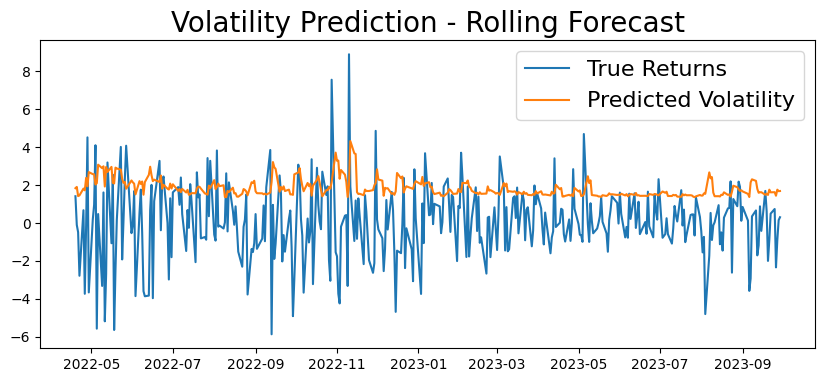

In [19]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# ARMA-GARCH

In [29]:
import pmdarima
import arch

# fit ARIMA on returns 
arima_model_fitted = pmdarima.auto_arima(returns)
p, d, q = arima_model_fitted.order
arima_residuals = arima_model_fitted.arima_res_.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

# Use ARIMA to predict mu
predicted_mu = arima_model_fitted.predict(n_periods=1)[3458]

# Use GARCH to predict the residual
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et

c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21110.579830763367
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2270548.095734559
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6788.629303912112
Iteration:      4,   Func. Count:     28,   Neg. LLF: 6707.006661279542
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1292662614.9670794
Iteration:      6,   Func. Count:     40,   Neg. LLF: 6687.0490774612645
Iteration:      7,   Func. Count:     46,   Neg. LLF: 6732.430852088337
Iteration:      8,   Func. Count:     52,   Neg. LLF: 6656.886239352877
Iteration:      9,   Func. Count:     57,   Neg. LLF: 6656.751803257448
Iteration:     10,   Func. Count:     62,   Neg. LLF: 6656.749395794226
Iteration:     11,   Func. Count:     67,   Neg. LLF: 6656.749324175855
Iteration:     12,   Func. Count:     72,   Neg. LLF: 6656.749311606376
Iteration:     13,   Func. Count:     76,   Neg. LLF: 6656.749311607582
Optimization terminated successfully    (Exit mode 0)
       

c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Pam\miniconda3\envs\forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [31]:
prediction

0.17602379123746514